<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header=None, names=names)
data = pd.read_csv('../DATA/housing_data.csv', header=None, names=names)

In [8]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
# Shape
data.shape

(506, 14)

In [10]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


##### 1. Plot Histogram of `RM` (# of rooms)

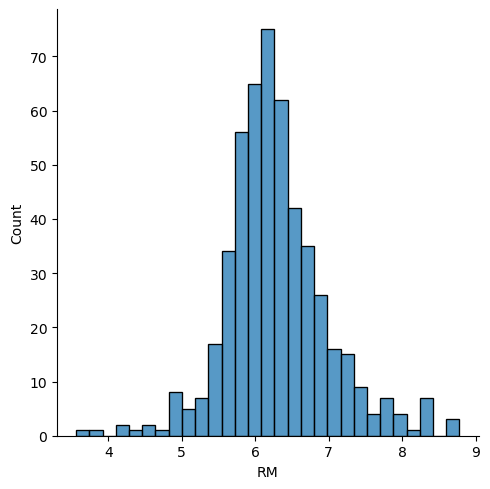

In [11]:
#  ANSWER
sns.displot(data, x="RM")

##### 2. Plot Histogram of `MEDV` (value)

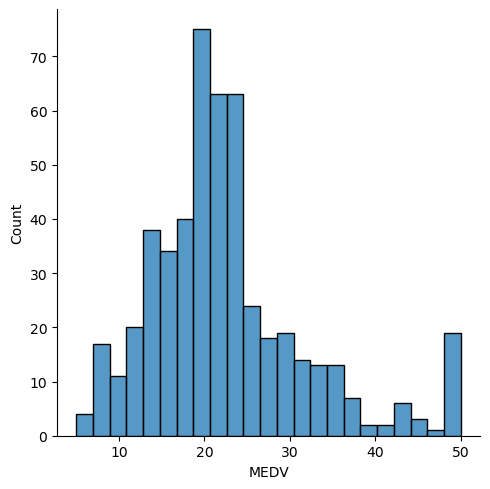

In [12]:
# ANSWER
sns.displot(data, x="MEDV")

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

<Axes: xlabel='RM', ylabel='MEDV'>

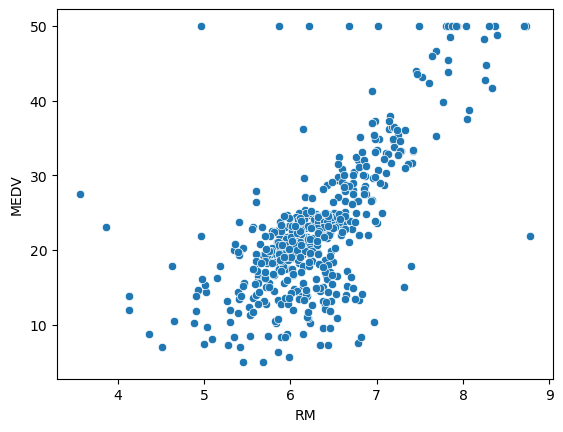

In [13]:
# ANSWER
sns.scatterplot(data, x="RM", y="MEDV")

##### 3.B Is there any trend? State your observation.

**ANSWER:**: ...
The value of homes seems to increase with the number of rooms

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, it is a large house. Otherwise the house is small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference in the mean of prices between the large and small houses.
    H1: There is a difference in the mean of prices between the large and small houses.
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [14]:
# ANSWER
alpha = 0.5

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have no more than 6 rooms.

Take sample of 100 houses in each dataset.

In [15]:
# ANSWER
N = 100
large_houses = data[data.RM > 6]["MEDV"].sample(N)
small_houses = data[data.RM <= 6]["MEDV"].sample(N)

In [30]:
large_houses.head()

401     7.2
292    27.9
157    41.3
461    17.7
241    20.1
Name: MEDV, dtype: float64

In [17]:
type(large_houses)

pandas.core.series.Series

In [31]:
large_houses.info()

<class 'pandas.core.series.Series'>
Index: 100 entries, 401 to 52
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

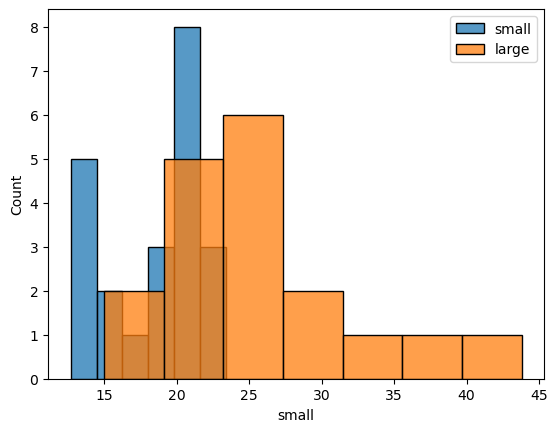

In [18]:
# ANSWER
samples = pd.DataFrame({"large":large_houses, "small":small_houses}, index=range(100))
sns.histplot(samples, x="small", label="small")
sns.histplot(samples, x="large", label="large")
plt.legend()
plt.show()

##### 7. Calculate Variance

Calculate variance for both samples.

In [19]:
# ANSWER
v_small = small_houses.var()
v_large = large_houses.var()

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [20]:
# ANSWER
sp = math.sqrt((v_small + v_large)/2)
print(sp)

7.727014627299799


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [21]:
# ANSWER
t = (large_houses.mean() - small_houses.mean()) / (sp * math.sqrt(2/N))
# t2 = (large_houses.mean() - small_houses.mean()) / math.sqrt((v_large + v_small)/N)
t

6.794691227528864

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [22]:
# ANSWER
df = N - 2
df

98

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [23]:
# ANSWER
p = 1 - stats.t.cdf(t, df)
p

4.2481385076342804e-10

In [24]:
t_correct, p_correct = stats.ttest_ind(large_houses, small_houses)
print(f"t: calculated {t}, actual {t_correct}")
print(f"p: calculated: {p}, actual {p_correct}")

t: calculated 6.794691227528864, actual 6.794691227528864
p: calculated: 4.2481385076342804e-10, actual 1.2432761785888623e-10


❓ ↑ Why do `1 - stats.t.cdf(t, df)` and `stats.ttest_rel()` return different results for p?

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [25]:
# ANSWER
def p_conclusion(p, alpha):
    print(f"p = {round(p, 4)}, alpha = {alpha} =>")
    if p < alpha:
        print("Accept the alternate hypothesis")
    else:
        print("Accept the null hypotheses")

In [26]:
# ANSWER
p_conclusion(p, 0.5)

p = 0.0, alpha = 0.5 =>
Accept the alternate hypothesis


In [27]:
# ANSWER

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [28]:
# ANSWER

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [29]:
# ANSWER
t_correct, p_correct = stats.ttest_ind(large_houses, small_houses)




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



